Tree based models for classification and regression
---

Note that the examples used here are mostly taken from the sklearn package, see [https://scikit-learn.org/stable/index.html](https://scikit-learn.org/stable/index.html)

# Classification trees (decision trees)

In [27]:
# import data: iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

## Data exploration

Iris Setosa:

<img src="images/Iris_setosa.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

Iris Versicolor:

<img src="images/Iris_versicolor.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

Iris Virginica:

<img src="images/Iris_virginica.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [28]:
# construct dataframe to look at the data - we use pandas for that
import pandas as pd
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
iris_data['target'] = pd.Series(data=iris_data['target'], dtype='category')
iris_data['target'].cat.categories = iris.target_names
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
# sample size
print('There are {} samples in this dataset.'.format(iris_data.shape[0]))

There are 150 samples in this dataset.


/home/marius/anaconda3/envs/machine_learning/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


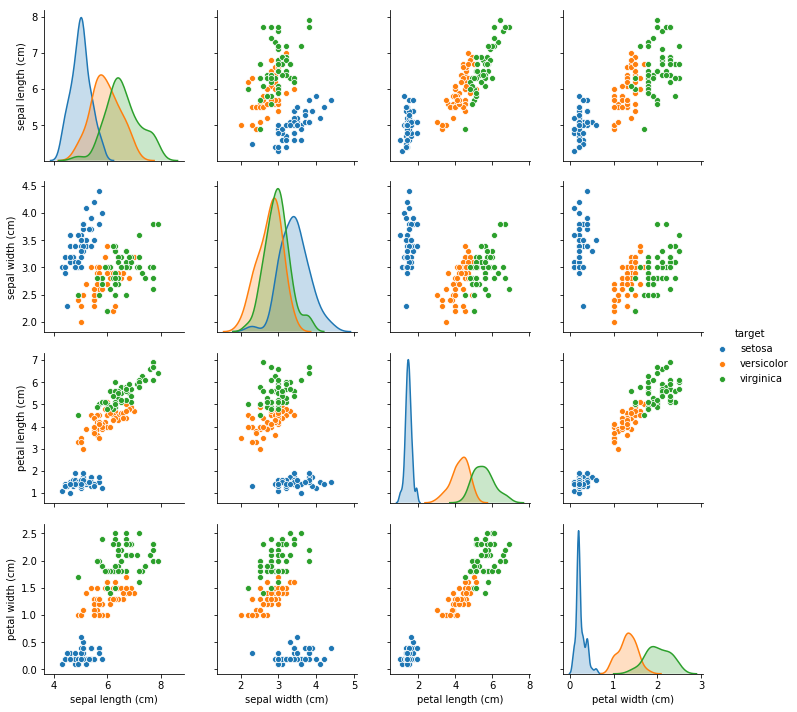

In [30]:
# to look at distributions in pairs of features, we use the package seaborn
import seaborn as sns
sns.pairplot(data=iris_data, hue='target')

In [31]:
# are the classes balanced?
class_names = iris.target_names
{class_name: np.sum(iris_data['target'] == class_name) for class_name in class_names}

{'setosa': 50, 'versicolor': 50, 'virginica': 50}

## Prep data

In [32]:
# split into training and test set
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


## Fit tree classifier to the data

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree = DecisionTreeClassifier(criterion='entropy', 
                                       max_depth=None)

In [34]:
# fit the model to the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
# can look at feature importance for this dataset given the model
# normalized total reduction of the criterion (entropy in this case) brought by this feature
feat_imp_tree = {np.array(iris.feature_names)[idx]: np.round(decision_tree.feature_importances_[idx], 2)
            for idx in np.arange(4)}
feat_imp_tree

{'sepal length (cm)': 0.02,
 'sepal width (cm)': 0.02,
 'petal length (cm)': 0.89,
 'petal width (cm)': 0.07}

## Visualise the fitted tree

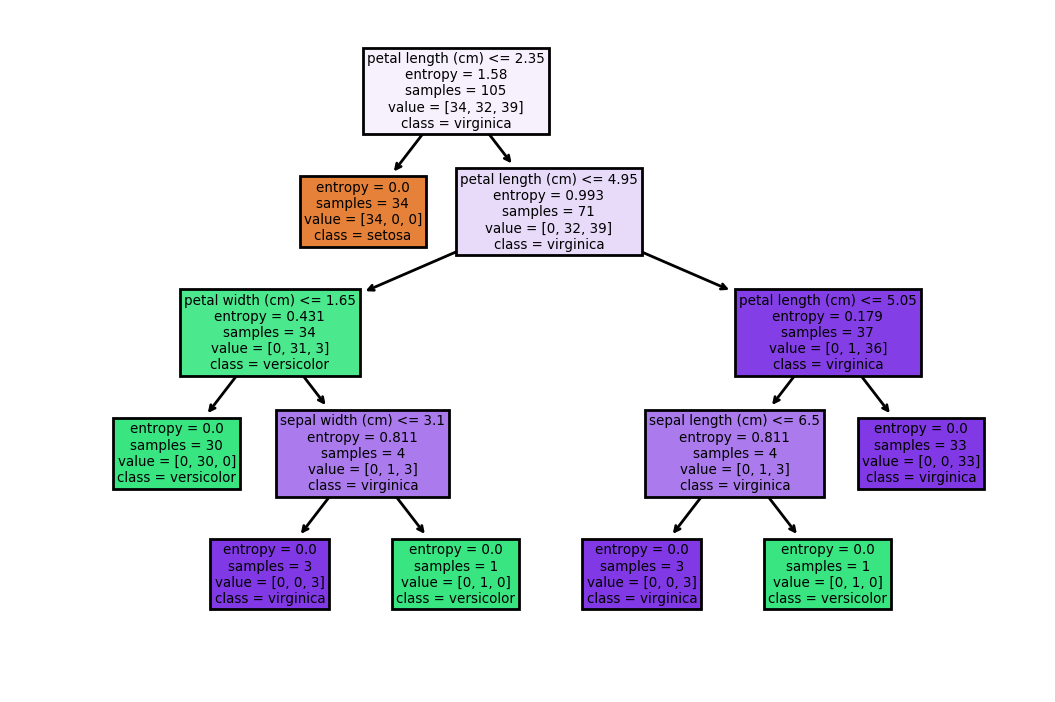

In [36]:
# visualise the tree
import matplotlib.pyplot as plt
_ = plot_tree(decision_tree, 
                   ax=plt.figure(None, dpi=200).gca(),
                  filled=True, feature_names=iris.feature_names, 
                   class_names=iris.target_names, ) 

## Visualise the input space segmentation

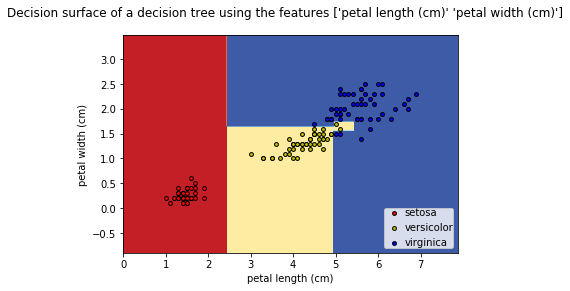

In [37]:
# hard to visualise in 4D - let's restrict ourselved to just 2 features
import numpy as np
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
pair = [2, 3]

X_p = iris.data[:, pair]
y_p = iris.target

# Train
clf = DecisionTreeClassifier().fit(X_p, y_p)

# construct a grid
X_p_min, X_p_max = X_p[:, 0].min() - 1, X_p[:, 0].max() + 1
y_p_min, y_p_max = X_p[:, 1].min() - 1, X_p[:, 1].max() + 1
X_pX_p, y_py_p = np.meshgrid(np.arange(X_p_min, X_p_max, plot_step),
                     np.arange(y_p_min, y_p_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[X_pX_p.ravel(), y_py_p.ravel()])
Z = Z.reshape(X_pX_p.shape)
cs = plt.contourf(X_pX_p, y_py_p, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idX_p = np.where(y_p == i)
    plt.scatter(X_p[idX_p, 0], X_p[idX_p, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using the features {}".
             format(np.array(iris.feature_names)[pair]))
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## Comptue classification accuracy

In [38]:
# test the model - just apply to the test data
y_pred = decision_tree.predict(X_test)

In [39]:
# compute classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy score for this model: {:2.2f}'.format(acc_score))

Accuracy score for this model: 0.98


That's the overall accuracy - however, it is interesting to ask how well we did for *each class* in the data seperately.

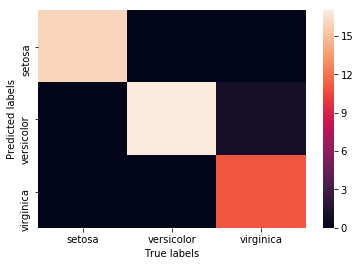

In [40]:
# plot the confusion matrix - shows how well we did for each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(data=cm, xticklabels=iris.target_names,
           yticklabels=iris.target_names,)
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
plt.show()

In [41]:
# normalise the confusion matrix to get per class accuracies
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_acc = cm.diagonal()

for idx, class_name in enumerate(iris.target_names):
    acc = np.round(cm_acc[idx], 2)
    print('Accuracy for class {} = {}'.format(class_name, acc))

Accuracy for class setosa = 1.0
Accuracy for class versicolor = 0.94
Accuracy for class virginica = 1.0


# Random Forests

We would like to see whether we can get a higher classification accuracy by using a random forest instead of a simple decision tree model.

## Fit the model

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# initiate a random forest object
rfc = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             max_depth=None, 
                             bootstrap=True, 
                             n_jobs=None,
                            random_state=0)

In [44]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
# look at feature importances
feat_imp_rf = {np.array(iris.feature_names)[idx]: np.round(rfc.feature_importances_[idx], 2)
            for idx in np.arange(4)}
feat_imp_rf

{'sepal length (cm)': 0.09,
 'sepal width (cm)': 0.03,
 'petal length (cm)': 0.47,
 'petal width (cm)': 0.41}

## Classification accuracy

In [46]:
# test the model - just apply to the test data
y_pred = rfc.predict(X_test)

In [47]:
# compute classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy score for this model: {:2.2f}'.format(acc_score))

Accuracy score for this model: 0.98


That's the overall accuracy - however, it is interesting to ask how well we did for *each class* in the data seperately.

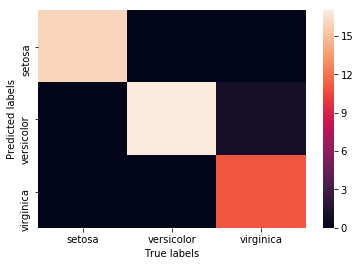

In [48]:
# plot the confusion matrix - shows how well we did for each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(data=cm, xticklabels=iris.target_names,
           yticklabels=iris.target_names,)
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
plt.show()

In [49]:
# normalise the confusion matrix to get per class accuracies
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_acc = cm.diagonal()

for idx, class_name in enumerate(iris.target_names):
    acc = np.round(cm_acc[idx], 2)
    print('Accuracy for class {} = {}'.format(class_name, acc))

Accuracy for class setosa = 1.0
Accuracy for class versicolor = 0.94
Accuracy for class virginica = 1.0


# Summary

* No difference in classification accuracy --> datset **too simple** to make use of the power of RFs (only 4 features, one class lin. seperable from others)
* Feature selection techniques build-in (mean decrease in branch impurity)
* Trees had the advantage of being very easy to interpret, Random forests are more black-box like